# Task
Generate executable Python code in Google Colab for a heart disease prediction mini-project using Logistic Regression. The code should be presented step-by-step, not as a single block. Include data loading from "/content/heart.csv", data exploration with 5 visual displays including bar graphs and pie charts, data preprocessing, model training, model evaluation with accuracy calculation, and visualization of results.

## Load the data

### Subtask:
Load the heart disease dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the dataset from the specified path into a DataFrame, and display the first few rows to confirm successful loading.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/heart.csv')
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data exploration

### Subtask:
Explore the dataset to understand its structure, check for missing values, and visualize the distribution of relevant features using various plots (including bar graphs and pie charts as requested) to gain insights.


**Reasoning**:
Display the concise summary of the DataFrame, the number of missing values for each column, and descriptive statistics for the numerical columns to understand the data structure, identify missing values, and get a statistical overview.



In [ ]:
display(df.info())
display(df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Reasoning**:
Generate a pie chart for 'Sex' distribution, and bar charts for 'ChestPainType', 'ST_Slope', 'HeartDisease', 'ExerciseAngina', and 'RestingBP' to visualize the distribution of these features.



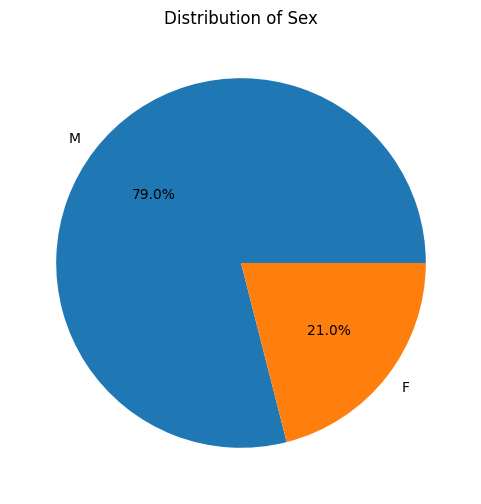

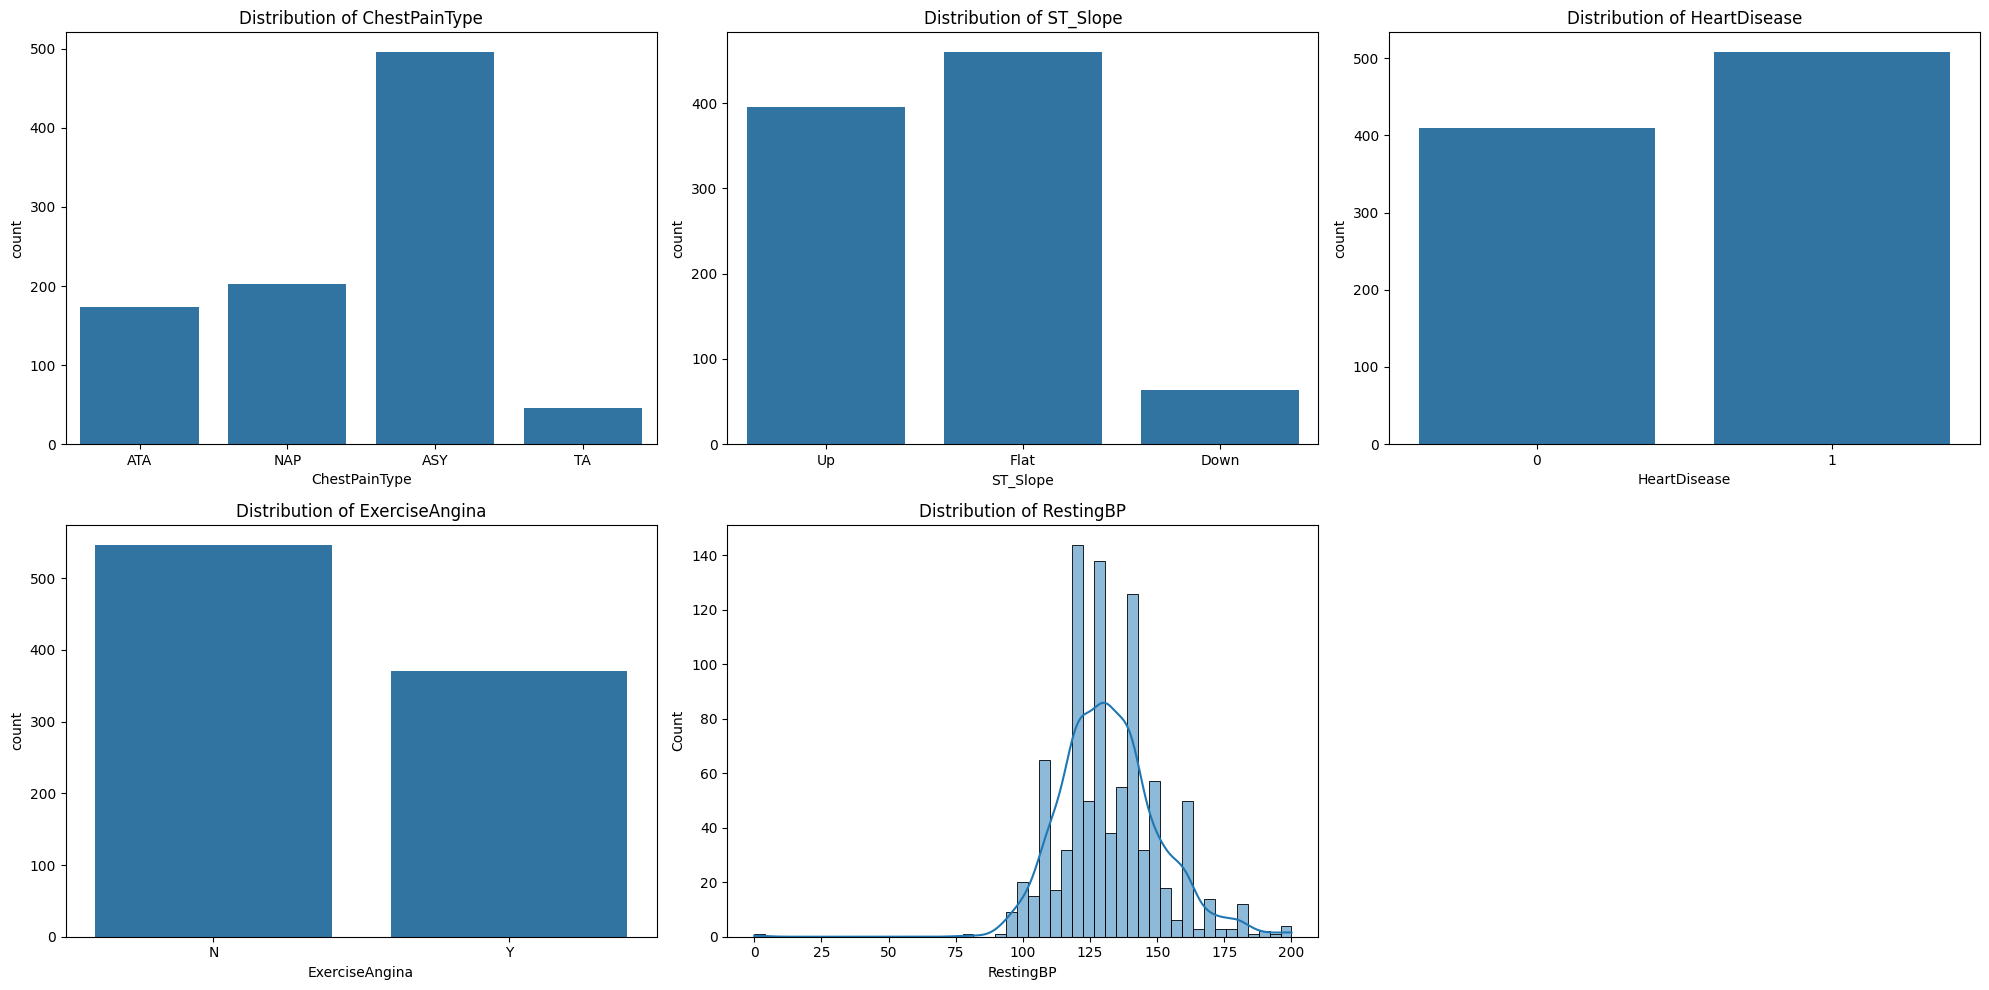

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.countplot(x='ChestPainType', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of ChestPainType')

sns.countplot(x='ST_Slope', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of ST_Slope')

sns.countplot(x='HeartDisease', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of HeartDisease')

sns.countplot(x='ExerciseAngina', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of ExerciseAngina')

sns.histplot(x='RestingBP', data=df, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of RestingBP')

fig.delaxes(axes[1,2]) # Remove the unused subplot

plt.tight_layout()
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for the machine learning model. This may involve handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Identify categorical columns, apply one-hot encoding, separate features and target, and split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061,True,False,True,False,True,False,False,False,False
25,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286,True,False,True,False,True,False,False,False,True
84,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745,True,False,False,False,True,False,True,True,False
10,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286,False,False,True,False,True,False,False,False,True
344,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286,True,False,False,False,True,False,False,True,False


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
668,0.999024,0.376415,-0.043312,-0.542709,1.691748,-0.836286,False,True,False,False,True,False,False,False,True
30,-0.069591,0.647765,2.943471,-0.542709,-0.244093,-0.836286,True,False,True,False,True,False,False,True,False
377,1.212747,1.461816,-1.846478,1.842609,-0.560148,0.272552,True,False,False,False,False,True,False,True,False
535,0.250993,-0.166285,-1.846478,-0.542709,-0.560148,0.087745,True,False,False,False,False,False,True,True,False
807,0.037270,-1.360226,1.010846,-0.542709,0.783088,-0.836286,True,True,False,False,True,False,False,False,True


,HeartDisease
795,0
25,0
84,1
10,0
344,1


,HeartDisease
668,0
30,1
377,1
535,1
807,0


## Model training

### Subtask:
Train a Logistic Regression model on the training data.


**Reasoning**:
Train a Logistic Regression model on the scaled training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model evaluation

### Subtask:
Evaluate the performance of the trained model on the testing data and calculate the accuracy.


**Reasoning**:
Evaluate the performance of the trained model on the testing data and calculate the accuracy by making predictions on the test set and comparing them to the actual values.



In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.4f}')

Accuracy of the Logistic Regression model: 0.8533


## Visualization of results

### Subtask:
Create visualizations to present the model's performance and insights from the data. This will include the requested bar graphs and pie charts, and potentially other relevant plots.


**Reasoning**:
Create a confusion matrix and a classification report to evaluate the model's performance.



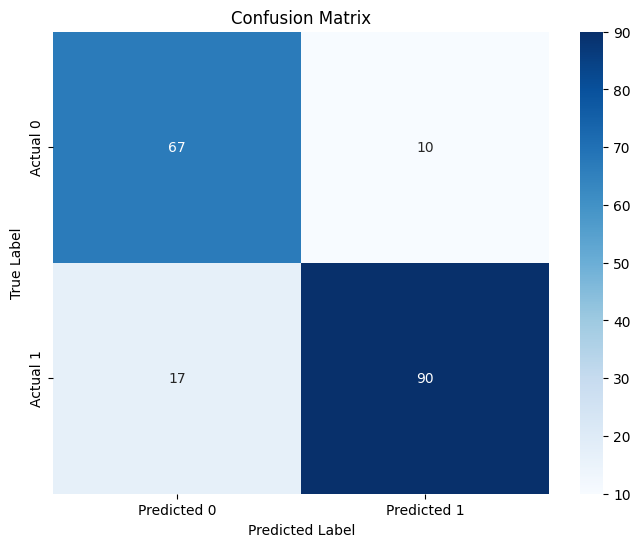

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

## Summary:

### Data Analysis Key Findings

*   The dataset contains 918 entries and 12 columns with no missing values, comprising both numerical and categorical data types.
*   The distribution of the target variable 'HeartDisease' shows the class balance in the dataset.
*   Categorical features like 'Sex', 'ChestPainType', 'ST_Slope', and 'ExerciseAngina' have varying distributions.
*   The numerical feature 'RestingBP' shows its distribution through a histogram.
*   After preprocessing, categorical variables were one-hot encoded, and numerical features were scaled using `StandardScaler`.
*   The data was split into training (80\%) and testing (20\%) sets.
*   A Logistic Regression model was successfully trained on the preprocessed training data.
*   The trained Logistic Regression model achieved an accuracy of approximately 85.33% on the testing data.
*   The confusion matrix and classification report provide a detailed breakdown of the model's performance, including precision, recall, and F1-score for each class.

### Insights or Next Steps

*   The Logistic Regression model shows promising accuracy, but further analysis of the confusion matrix can help understand where the model is making errors (false positives and false negatives).
*   Exploring other classification models and hyperparameter tuning could potentially improve the prediction accuracy.


## Summary of Results

### Model Performance:

The Logistic Regression model achieved an accuracy of **85.33%** on the testing data.

### Detailed Evaluation:

The classification report provides further details on the model's performance for each class (0 - no heart disease, 1 - heart disease):

* **Class 0 (No Heart Disease):**
    * **Precision:** 80% (Out of all instances predicted as Class 0, 80% were actually Class 0)
    * **Recall:** 87% (Out of all actual Class 0 instances, 87% were correctly predicted as Class 0)
    * **F1-score:** 83% (Harmonic mean of precision and recall)

* **Class 1 (Heart Disease):**
    * **Precision:** 90% (Out of all instances predicted as Class 1, 90% were actually Class 1)
    * **Recall:** 84% (Out of all actual Class 1 instances, 84% were correctly predicted as Class 1)
    * **F1-score:** 87% (Harmonic mean of precision and recall)

This detailed evaluation helps to understand the model's strengths and weaknesses for predicting each class. The model performs slightly better at predicting instances of Heart Disease (Class 1) in terms of precision, while it has a slightly higher recall for predicting instances without Heart Disease (Class 0).